First check scikit-learn version, before v0.18, train_test_split function was in module sklearn.cross_validation

Use pip or conda to upgrade\*
*pip install -U scikit-learn*    
*conda install scikit-learn*

\* After using pip to upgrade sklearn, *pip3 list* command showed that I had 0.19 version sklearn but jupyter notebook still reported the version was 0.17    
I then used conda and it solved the problem

In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.0.


In [20]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [5]:
diabetes = datasets.load_diabetes()
print diabetes.DESCR

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [6]:
# load dataset into dataframe
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
df = pd.DataFrame(diabetes.data, columns=columns) 
y = diabetes.target

In [8]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(353, 10) (353L,)
(89, 10) (89L,)


In [9]:
print y_test

[  83.  168.   63.   50.  129.  198.  232.  151.  275.   96.   67.  196.
   88.   95.  200.  346.  140.   73.   72.  261.   45.  102.  241.   85.
  177.  103.   68.   91.  246.  263.  173.  163.  132.   48.  123.  153.
  310.   78.   67.   71.  138.   84.   83.   89.   68.   69.  142.  202.
  190.  113.   77.   90.  206.   72.  332.  135.   31.  219.  144.  208.
  233.  142.  248.  101.  274.  161.  202.  173.  264.   81.  259.  222.
  216.  192.  237.  275.   53.   65.   51.   52.  258.  186.  273.  122.
  134.  151.  283.  178.   54.]


In [11]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print predictions[0:5]

[ 146.70266819  153.38816103   57.01504979  145.96422064  158.08574209]


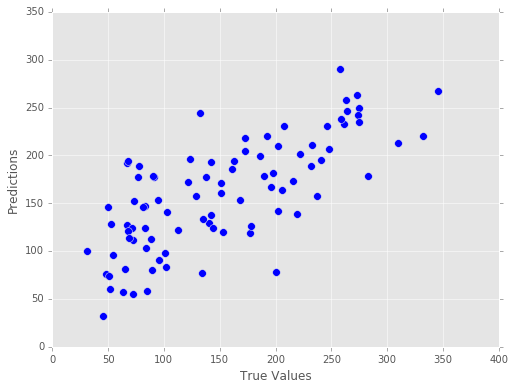

In [32]:
# plot
plt.figure(figsize = (8, 6))
plt.scatter(y_test, predictions, s = 60)
# plt.grid(True, color='w', linestyle='-', linewidth=2)
# plt.gca().patch.set_facecolor('0.8')

plt.xlabel("True Values")
plt.ylabel("Predictions")

In [35]:
print "Score:", model.score(X_test, y_test)

Score: 0.525900239675
